## Time to get your hands dirty!

### 1. A gaussian integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)


### 2. Kicking horses

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.

(Hint: think about sample mean and sample variance)

# Montecarlo Integral

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

Instead of manually removing the negative samples, I can be more efficient taking a scipy half gaussian!
The shape of the distribution:
$$ pdf(x) = \frac{\sqrt 2}{\sqrt \pi \sigma} exp \left(- \frac{x^2}{2 \sigma^2}\right) $$

In [2]:
def integral (loc, sigma, N):
    
        x = sp.halfnorm(loc = loc, scale = sigma).rvs(N)
        func = x**3
    
        return np.mean(func) * np.sqrt(np.pi / 2) * sigma 
        sigma = 3

Changing the values of sigma, I can have different relative errors. I can try to plot the distribution

In [3]:
N = 100000
sigma_vec = np.linspace(0.5, 10000, 10000)
Result_vector, Rel_error = [],[]

for sigma in sigma_vec:
    
    EI = integral(0, sigma, N)   
    true_I = 2 * sigma**4 
    
    Result_vector.append(EI)
    Rel_error.append(1 - EI/true_I)

Rel_error = np.array(Rel_error)

Text(0.5, 0, 'Relative error')

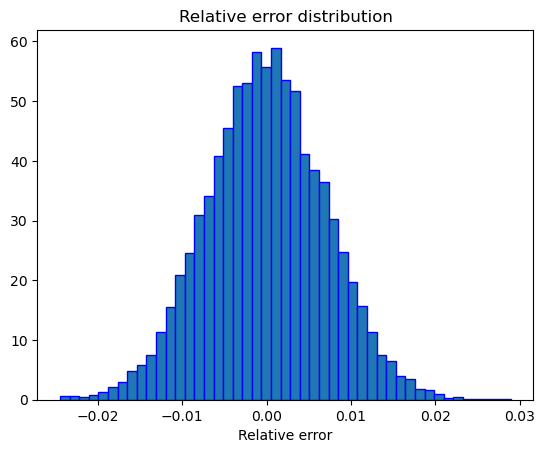

In [4]:
plt.hist(Rel_error, bins = 'scott', edgecolor = 'blue', density = True)
plt.title('Relative error distribution')
plt.xlabel('Relative error')

Text(0.5, 1.0, 'Fit')

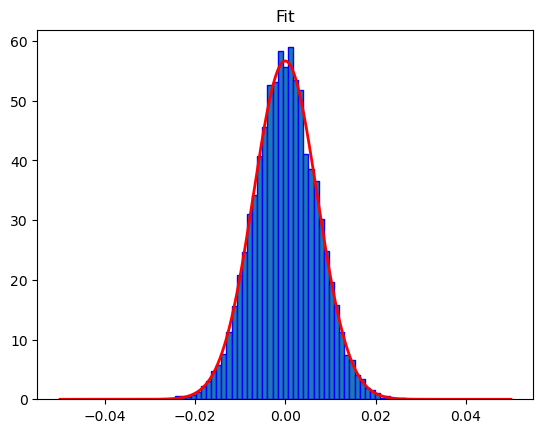

In [5]:
# try a gaussian fit for the distribution of errors:

mean = np.average(Rel_error)
std = np.std(Rel_error)

gaussian = sp.norm(loc = mean, scale = std)

x = np.linspace(-0.05, 0.05, 1000)
plt.hist(Rel_error, bins = 'scott', edgecolor = 'blue', density = True)
plt.plot(x, gaussian.pdf(x), lw = 2, c = 'red')
plt.title('Fit')

## Changing N

The first task is to see what happens when we change the number of samples used to compute the integral and to see how the error on the result goes

In [6]:
sigma = 10
Result_vector, N_steps, Rel_error = [],[],[]

N_array = np.logspace(3, 5, 10000, dtype = int)

# Anlaytical result
true_I = 2 * sigma**4 

for N in N_array:

    EI = integral(0, sigma, N)    
    
    Result_vector.append(EI)
    Rel_error.append(1 - EI/true_I)

print('Evaluated Integral =', EI)
print('Exact Integral =', true_I)
print('Relative error =', 1 - EI/true_I)

Evaluated Integral = 20053.05324411131
Exact Integral = 20000
Relative error = -0.0026526622055655924


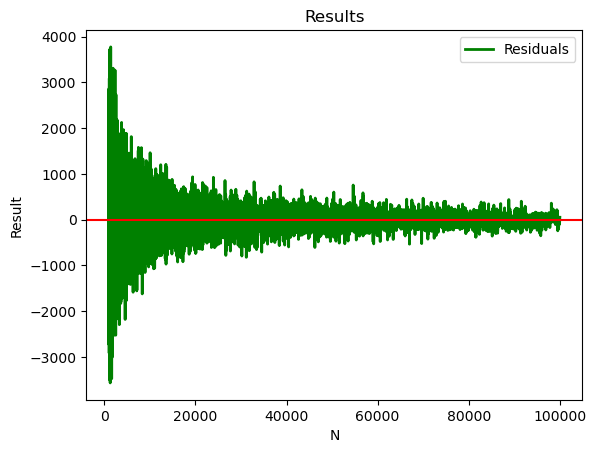

In [7]:
#Plotting the results
Result_vector = np.array(Result_vector)

plt.plot (N_array, Result_vector - true_I, color = 'green', lw = 2, label = 'Residuals')
plt.title('Results')
plt.xlabel('N')
plt.ylabel('Result')
plt.axhline(y = 0, color = 'r', linestyle = '-') 
plt.legend()
plt.show()

The result converge more and more to the expected value reducing it's spread! 


I can study the error slope 

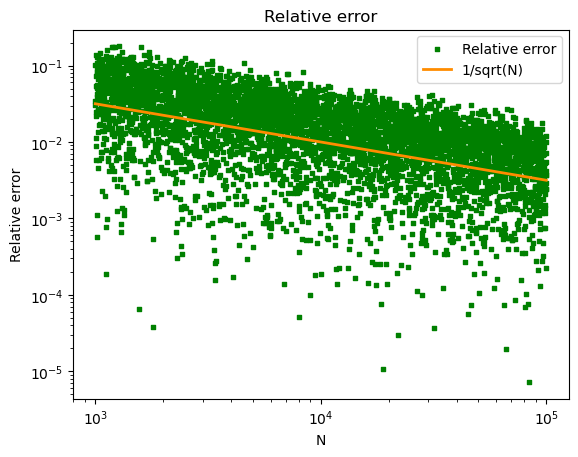

In [8]:
#Plotting the absolute value of the relative errors on the result

plt.scatter(N_array, Rel_error, color = 'green', marker='s', s = 5, label = 'Relative error')
plt.title('Relative error')
plt.xlabel('N')
plt.ylabel('Relative error')

# I expect that the errors on the result to go down as 1/sqrt(N)
plt.plot(N_array, 1/np.sqrt(N_array), color = 'darkorange', label = '1/sqrt(N)', lw = 2)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

# Kicking horses

In [9]:
from scipy.stats import poisson

Expected deaths =  0.6600985221674877


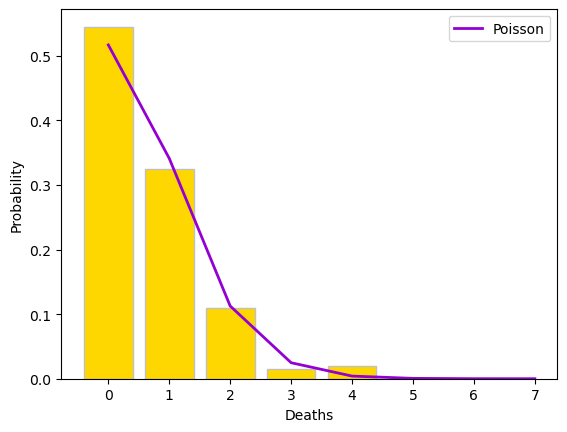

In [10]:
#Data
corpes = np.array([109, 65, 22, 3, 4])
deaths = np.array([0, 1, 2, 3, 4])

#Computing the values of mu from the data using the weighted averege
#Computing the probability vector associated to each possibility (y of Poisson PDF)
mu = np.average(deaths, weights=corpes)
probability = corpes/200
print('Expected deaths = ', mu)

#Histogram
plt.bar(deaths, probability, color= 'gold', edgecolor='silver')

#PDF
x_grid = np.arange(0, 8, 1)
plt.plot(x_grid, poisson.pmf(x_grid, mu), color = 'darkviolet', lw = 2, label = 'Poisson')
plt.xlabel('Deaths')
plt.ylabel('Probability')
plt.legend()
plt.show()